<a href="https://www.kaggle.com/code/aisuko/monocular-depth-estimation?scriptVersionId=161878431" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview

Monocular depth estimation is a computer vision task that involves predicting the depth information of a scene from a single image. In other words, it is the process of estimating the distance of objects in a scene from a single camera viewpoint.

Monocular depth estimation has various applications, including 3D reconstruction, augmented reality, autonomous driving, and robotics. It is a challengeing task as it requires the model to understand the complex relationship between obects in the scene and the corresponding depth information, which can be affected by factors such as lighting conditions, occusion, and texture.

In [1]:
!pip install transformers==4.35.2

# Depth estimation pipeline

Let's use the corresponding `pipeline()`

In [2]:
from transformers import pipeline
import torch

model_checkpoint="vinvino02/glpn-nyu"
depth_estimator=pipeline("depth-estimation", model=model_checkpoint)

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/245M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Let's choose an image to analyze

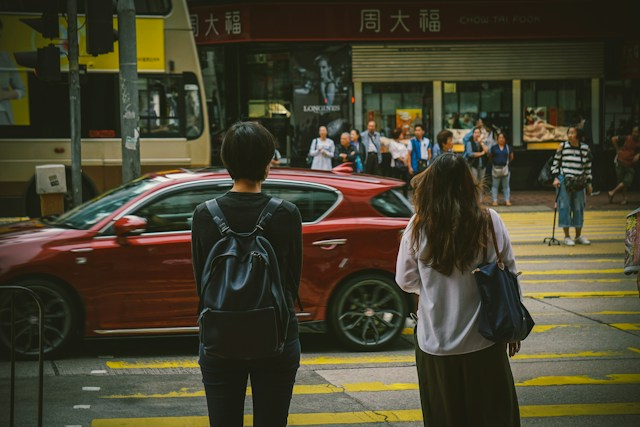

In [3]:
from PIL import Image
import requests

url="https://unsplash.com/photos/HwBAsSbPBDU/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MzR8fGNhciUyMGluJTIwdGhlJTIwc3RyZWV0fGVufDB8MHx8fDE2Nzg5MDEwODg&force=true&w=640"
image=Image.open(requests.get(url, stream=True).raw)
image

In [4]:
predictions=depth_estimator(image)

The pipeline returns a dictionary with two entries. 

- The first one, called `predicted_depth`, is a tensor with the values being the depth expressed in meters for each pixel.

- The second one, `depth`, is a PIL image that visualizes the depth estimation result.

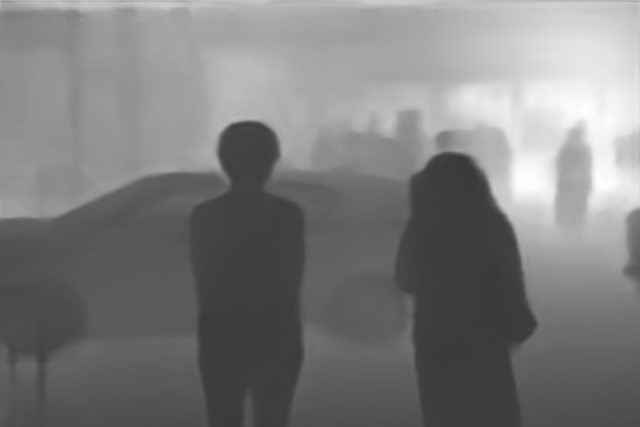

In [5]:
predictions["depth"]

# Depth estimation inference by hand

In [6]:
from transformers import AutoImageProcessor, AutoModelForDepthEstimation

image_processor=AutoImageProcessor.from_pretrained(model_checkpoint)
model=AutoModelForDepthEstimation.from_pretrained(model_checkpoint)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Prepare the image input for the model using `image_processor` that will take care of the necessary image transformations such as resizing and normalization

In [7]:
pixel_values=image_processor(image, return_tensors="pt").pixel_values

Pass the prepared inputs through the model

In [8]:
import torch

with torch.no_grad():
    outputs=model(pixel_values)
    predicted_depth=outputs.predicted_depth

Visualize the results

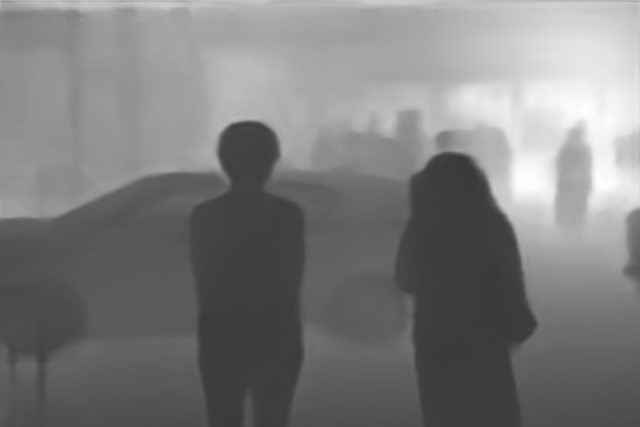

In [9]:
import numpy as np

# interpolate to original size
prediction=torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
).squeeze()

output=prediction.numpy()

formatted=(output*255/np.max(output)).astype("uint8")
depth=Image.fromarray(formatted)
depth